In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Income.csv")

In [3]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [6]:
df.drop(['Name'],axis=1,inplace=True)

In [7]:
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


KMeans has converged


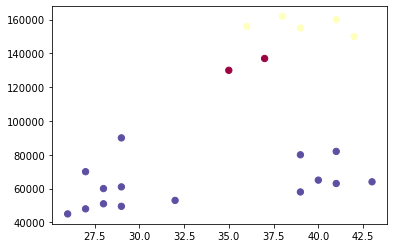

In [14]:
# put everything in a class
class KMeans():
    def __init__(self,x,num_clusters):
        self.k=num_clusters
        self.max_iter = 100
        self.num_examples, self.num_features = x.shape
        self.plot_figure = True
    def initialize_centroids(self,x):
        centroids = np.zeros((self.k,self.num_features))
        for k in range(self.k):
            centroid = x[np.random.choice(range(self.num_examples))]
            centroids[k]=centroid
        return centroids
    def create_cluster(self, x, centroids):
        clusters = [[]for _ in range(self.k)]
        for point_index, point in enumerate(x):
            closest_centroid = np.argmin(np.sqrt(np.sum((point-centroids)**2, axis =1)))
            clusters[closest_centroid].append(point_index)
        return clusters
    def calculate_new_centroids(self, clusters, x):
        centroids = np.zeros((self.k,self.num_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(x[cluster],axis=0)
            centroids[idx]=new_centroid
        return centroids                                   
    def predict_cluster(self,clusters,x):
        ypred = np.zeros(self.num_examples)
        for cluster_idx,cluster in enumerate(clusters):
            for sample_idx in cluster:
                ypred[sample_idx]=cluster_idx
        return ypred
    def plot_fig(self,x,y):
        plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.Spectral)
        plt.show()
    def fit(self,x):
        centroids=self.initialize_centroids(x)
        for it in range(self.max_iter):
            clusters=self.create_cluster(x,centroids)
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters,x)
            diff = centroids-previous_centroids
            if not diff.any():
                print("KMeans has converged")
                break
        ypred = self.predict_cluster(clusters,x)
        if self.plot_figure:
            self.plot_fig(x,ypred)
        return ypred
                                         
                                         
if __name__ == '__main__':
    np.random.seed(10)
    num_clusters = 3
    x= df.values
    Kmeans = KMeans(x,num_clusters)
    ypred = Kmeans.fit(x)
        
        
        
        